In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
import math
import numpy as np
import random 
import cmath
from numpy import *
import time
from numpy.linalg import inv

In [2]:
#Transform Functions
def DCT_matrix(x):
    N = len(x)
    C_matrix = np.ndarray(shape=(N,N), dtype=np.complex128)
    for i in range(N):
        for j in range(N):
            C_matrix[i][j] = (2*math.cos(i*math.pi*(2*j+1)/(2*N)))
    x = np.matrix(x)
    DCT_x = C_matrix.dot(x.T).tolist()
    DCT_x = [y for x in DCT_x for y in x]
    return DCT_x
def IDCT_matrix(X):
    N = len(X)
    C_matrix = np.ndarray(shape=(N,N), dtype=np.complex128)
    for i in range(N):
        for j in range(N):
            C_matrix[i][j] = (2*math.cos(i*math.pi*(2*j+1)/(2*N)))
    X = np.matrix(X)
    IC_matrix = inv(C_matrix)
    ICFT_X = IC_matrix.dot(X.T).tolist()
    ICFT_X = [y for x in ICFT_X for y in x]
    return ICFT_X
def DFT_matrix(x):
    N = len(x)
    W = complex(math.cos(2*math.pi/N), -math.sin(2*math.pi/N))
    W_matrix = np.ndarray(shape=(N,N), dtype=np.complex128)
    for i in range(N):
        for j in range(N):
            W_matrix[i][j] = (W**(i*j))
    x = np.matrix(x)
    DFT_x = W_matrix.dot(x.T).tolist()
    DFT_x = [y for x in DFT_x for y in x]
    return DFT_x
def IDFT_matrix(X):
    N = len(X)
    W = complex(math.cos(2*math.pi/N), -math.sin(2*math.pi/N))
    W_matrix = np.ndarray(shape=(N,N), dtype=np.complex128)
    for i in range(N):
        for j in range(N):
            W_matrix[i][j] = (W**(i*j))
    X = np.matrix(X)
    IW_matrix = inv(W_matrix)
    IDFT_X = IW_matrix.dot(X.T).tolist()
    IDFT_X = [y for x in IDFT_X for y in x]
    return IDFT_X
def haarMatrix(n):
    Level1 = math.log(n, 2)
    Level = int(Level1)+1

    #Initialization
    H = [1]
    NC = 1 / math.sqrt(2)    #normalization constant
    LP = [1, 1]
    HP = [1,-1]

    for i in range(1,Level):
        H = np.dot(NC, np.concatenate([np.matrix(np.kron(H, LP)), np.matrix(np.kron(np.eye(len(H)), HP))]))
    return H
def Harr_matrix(x):
    N = len(x)
    H_matrix = haarMatrix(64)
    x = np.matrix(x)
    Harr_x = H_matrix.dot(x.T).tolist()
    Harr_x = [y for x in Harr_x for y in x]
    return Harr_x 
def InversHarr_matrix(X):
    N = len(X)
    H_matrix = haarMatrix(64)
    X = np.matrix(X)
    IH_matrix = inv(H_matrix)
    IHarr_X = IH_matrix.dot(X.T).tolist()
    IHarr_X = [y for x in IHarr_X for y in x]
    return IHarr_X

In [3]:
#Modified X 
def X_m_DFT(X, L):
    N = len(X)
    Z = [0]*N
    for i in range(int(((N-L-1)/2))+ 1):
        Z[i] = X[i]
    for j in range(int((N+L+1)/2),N):
        Z[j] = X[j]
    return Z
def X_m_Harr(X, L):
    N = len(X)
    Z = [0]*N
    for k in range(N-L):
        Z[k] = X[k] 
    return Z
def X_m_DCT(X, L):
    N = len(X)
    Z = [0]*N
    for i in range(N-L):
        Z[i] = Z[i] + X[i] 
    return Z

In [4]:
#Energy
def Energy(x, x_m):
    N = len(x)
    E = 0
    for i in range(N):
        E = E + ((x[i] - x_m[i])**2)
    return (E/N)
def Energy_DFT(x, x_m):
    N = len(x)
    E = 0
    for i in range(N):
        Com = x[i] - x_m[i]
        E = E + ((Com.real)**2)+((Com.imag)**2)
    return (E/N)
def Energy_all(x):
    DFT_Enegy = []
    DCT_Enegy = []
    Harr_Enegy = []
    len_ = len(x)
    x_ = []
    for i in range(len_):
        x_.append(complex(x[i]))
    DFT_X = DFT_matrix(x_)
    DCT_X = DCT_matrix(x)
    Harr_X = Harr_matrix(x)
    for i in range(0, len_):
        DFT_Enegy.append(Energy_DFT(x, IDFT_matrix(X_m_DFT(DFT_X, i))))
        DCT_Enegy.append(Energy(x, IDCT_matrix(X_m_DCT(DCT_X, i))))
        Harr_Enegy.append(Energy(x, InversHarr_matrix(X_m_Harr(Harr_X, i))))
    return DFT_Enegy, DCT_Enegy, Harr_Enegy

C:\Users\dileepshukla901\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


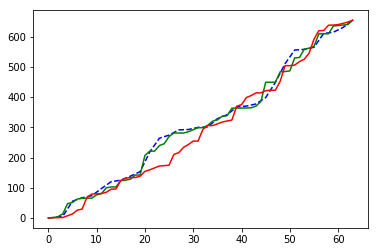

In [5]:
x = []
N = []
n = 64
for i in range(n):
    x.append(random.uniform(0, 100))
for i in range(n):
    N.append(i)
DFT_Enegy, DCT_Enegy, Harr_Enegy = Energy_all(x)
plt.plot(N, DFT_Enegy, 'b--')
plt.plot(N, DCT_Enegy, 'g')
plt.plot(N, Harr_Enegy, 'r')
plt.show()